In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
from scipy import stats

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms.csv to mushrooms.csv


In [ ]:
data = pd.read_csv("mushrooms.csv")


In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# Use isna() to detect missing values
missing_values = data.isna().sum()

print(missing_values)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
M_cols = data.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",data[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

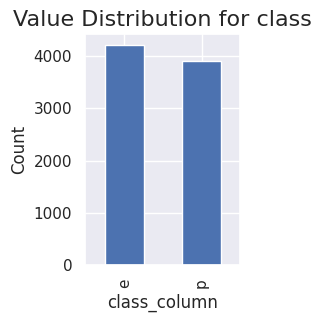

In [ ]:
class_column = M_cols[0]
class_value_counts = data[class_column].value_counts()

# Plot a bar graph
plt.figure(figsize=(2,3))
class_value_counts.plot(kind='bar')
plt.title(f'Value Distribution for {class_column}', fontsize=16)
plt.xlabel("class_column")
plt.ylabel('Count')
plt.show()

Y.head()

In [ ]:
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)

    if p < significance_level:
        print(f'\033[32m{input_var} has a significant relationship with the target variable.\033[0m')
    else:
        print(f'\033[31m{input_var} does not have a significant relationship with the target variable.\033[0m')

for i in cat_var:
    chi_squared_test(data, i, target)

cap-shape has a significant relationship with the target variable.
cap-surface has a significant relationship with the target variable.
bruises has a significant relationship with the target variable.
odor has a significant relationship with the target variable.
gill-attachment has a significant relationship with the target variable.
gill-spacing has a significant relationship with the target variable.
gill-size has a significant relationship with the target variable.
stalk-shape has a significant relationship with the target variable.
stalk-root has a significant relationship with the target variable.
stalk-surface-above-ring has a significant relationship with the target variable.
stalk-surface-below-ring has a significant relationship with the target variable.
stalk-color-above-ring has a significant relationship with the target variable.
stalk-color-below-ring has a significant relationship with the target variable.
veil-type does not have a significant relationship with the target

In [ ]:
X = data.drop(['class','veil-type'], axis = 1)
y = data['class']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
# Encode categorical variables
X = pd.get_dummies(X, prefix_sep='_', drop_first = True)
y = LabelEncoder().fit_transform(y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8124, 95) (4874, 95) (3250, 95)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(95,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 95)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                4800      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                1632      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 6498 (25.38 KB)
Trainable params: 6498 (

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
183/183 [==============================] - 3s 4ms/step - loss: 0.2646 - accuracy: 0.8926 - val_loss: 0.0540 - val_accuracy: 0.9785
Epoch 2/10
183/183 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0198 - val_accuracy: 0.9969
Epoch 3/10
183/183 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0088 - val_accuracy: 0.9969
Epoch 4/10
183/183 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0061 - val_accuracy: 0.9969
Epoch 5/10
183/183 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0034 - val_accuracy: 0.9985
Epoch 6/10
183/183 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9985
Epoch 7/10
183/183 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 

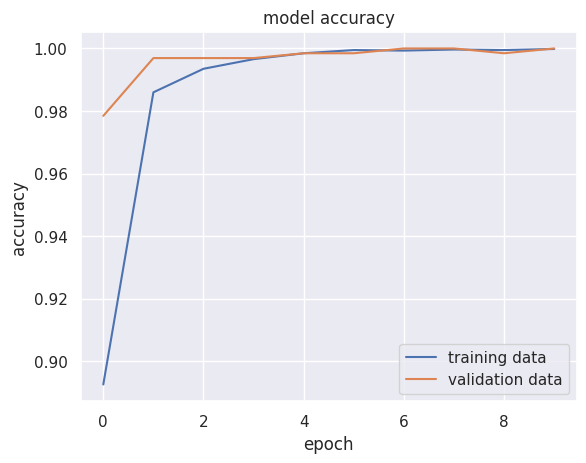

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

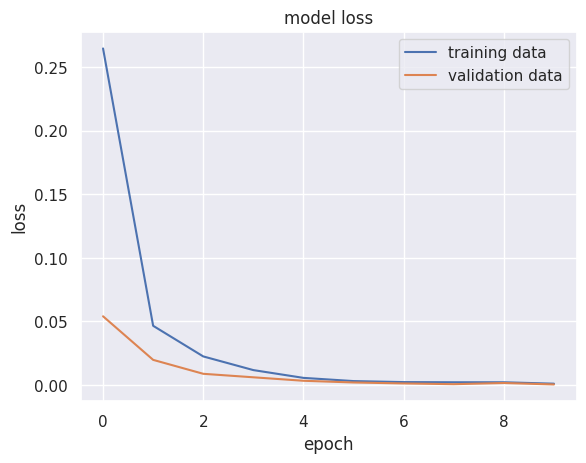

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

51/51 [==============================] - 0s 3ms/step - loss: 3.9983e-05 - accuracy: 1.0000
1.0


In [ ]:
print(X_test.shape)
print(X_test[0])

(3250, 116)
[-0.2378639  -0.02481713  1.26141782 -0.34447007 -0.0625579  -0.90442156
  1.56271891 -0.02026102 -0.67899277 -0.80551213 -0.15053409 -0.08381404
 -0.47361957 -0.53734171  1.58318502 -0.13242558 -0.04054702 -0.04054702
 -0.38773989 -0.38176587  0.84521371 -0.84521371 -0.22507214 -0.15751433
 -0.60057668 -0.22050638 -0.07180322  1.12982579 -0.17510532 -0.27942811
 -0.27340799 -0.16488333  0.16488333 -2.27712081  2.27712081  0.66901379
 -0.66901379 -0.52368728 -0.1125789  -0.31971267  3.22301884 -0.22607661
 -0.39679313 -0.08256375 -0.45861778 -0.05556127 -0.2547345  -0.4217389
 -0.10781039 -0.85992547  0.85992547 -0.66580242 -0.93752409 -0.26817075
  2.52682577 -0.15195342 -0.2699247  -0.64118449  0.75413248 -0.05738934
  3.55169328 -0.62242924 -1.25869194 -0.1883589  -0.23301019 -0.07180322
 -0.10974147 -0.28113121 -0.23738205 -0.15614094 -0.55127655  0.91043564
 -0.03510754 -0.23738205 -0.07180322 -0.10974147 -0.27513765 -0.25059893
 -0.15614094 -0.54716253  0.91761958 -0.

In [ ]:
Y_pred = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(3250, 2)
[0.99794734 0.00866316]


[[-0.2378639  -0.02481713  1.26141782 ... -0.3995596  -0.21324644
  -0.15819699]
 [-0.2378639  -0.02481713  1.26141782 ... -0.3995596  -0.21324644
  -0.15819699]
 [-0.2378639  -0.02481713 -0.79275874 ... -0.3995596  -0.21324644
  -0.15819699]
 ...
 [-0.2378639  -0.02481713  1.26141782 ...  2.50275556 -0.21324644
  -0.15819699]
 [-0.2378639  -0.02481713 -0.79275874 ... -0.3995596  -0.21324644
  -0.15819699]
 [-0.2378639  -0.02481713 -0.79275874 ... -0.3995596  -0.21324644
  -0.15819699]]


In [ ]:
Y_test

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print(Y_pred)

[[0.99794734 0.00866316]
 [0.00508924 0.988118  ]
 [0.00578814 0.98368853]
 ...
 [0.00114019 0.9970776 ]
 [0.01802796 0.98748404]
 [0.00438936 0.98068523]]


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 

In [ ]:
X_test

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1971,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6654,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5606,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3332,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
6988,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
428,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5627,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4030,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_columns', None)
X_test
column_names = X_test.columns
print(column_names)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1971,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6654,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5606,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3332,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
6988,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
428,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5627,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0